In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
# load data 
data=pd.read_csv("./adult.data",header=None)
data.columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
# Print basic information about the data set variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [103]:
# Check for missing data
data.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

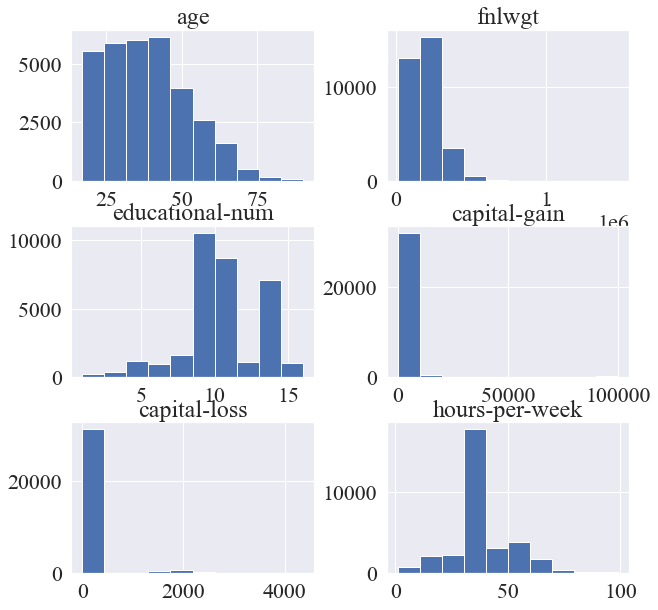

In [104]:
# Plotting numerical variables to see the distribution
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Times New Roman')
data.hist(figsize=(10,10))

h:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

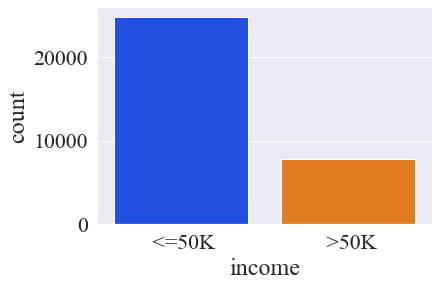

In [105]:
# Plotting the distribution of income variables
sns.countplot(data["income"],palette="bright")

In [106]:
# Print the number of different values of the income variable
data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [107]:
# Replace a value in the dataset with ? in the dataset with NaN
for items in data.columns:
    data[items].replace(' ?', np.nan,inplace=True)

In [108]:
# delete education column
data.drop(['education'], inplace=True,axis=1)
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [109]:
# Removal of duplicate samples
print("Before removing duplicates:", data.duplicated().sum())
data = data[~data.duplicated()]
print("After removing duplicates:", data.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [110]:
# Print the values of the different variables in the dataset
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0, 0.5, 'Average of Age')

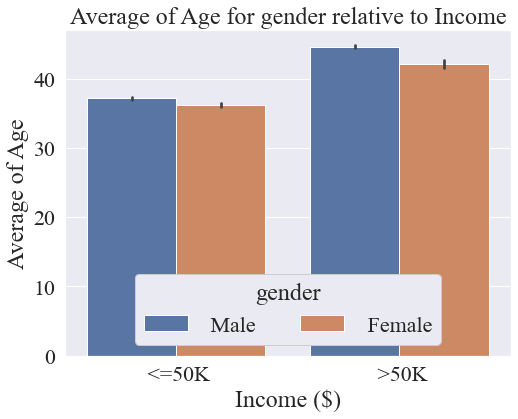

In [111]:
# Mapping the gender ratio for different income scenarios
plt.figure(figsize=[8,6])
ax = sns.barplot(data = data, x = 'income', y = 'age', hue = 'gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.title('Average of Age for gender relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age')

Text(0, 0.5, 'Average of Hours per Week')

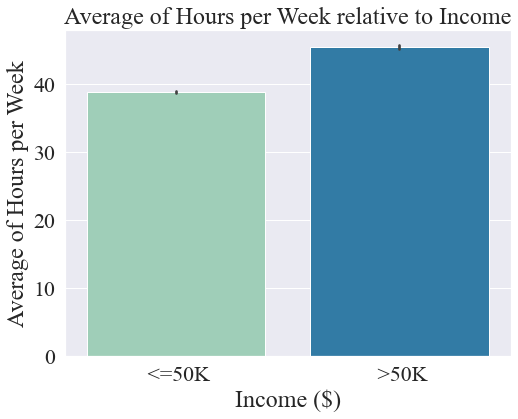

In [112]:
# Mapping the distribution of hours worked for different income scenarios
plt.figure(figsize=[8,6])
sns.barplot(data=data, x='income', y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week')

h:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
h:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
h:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

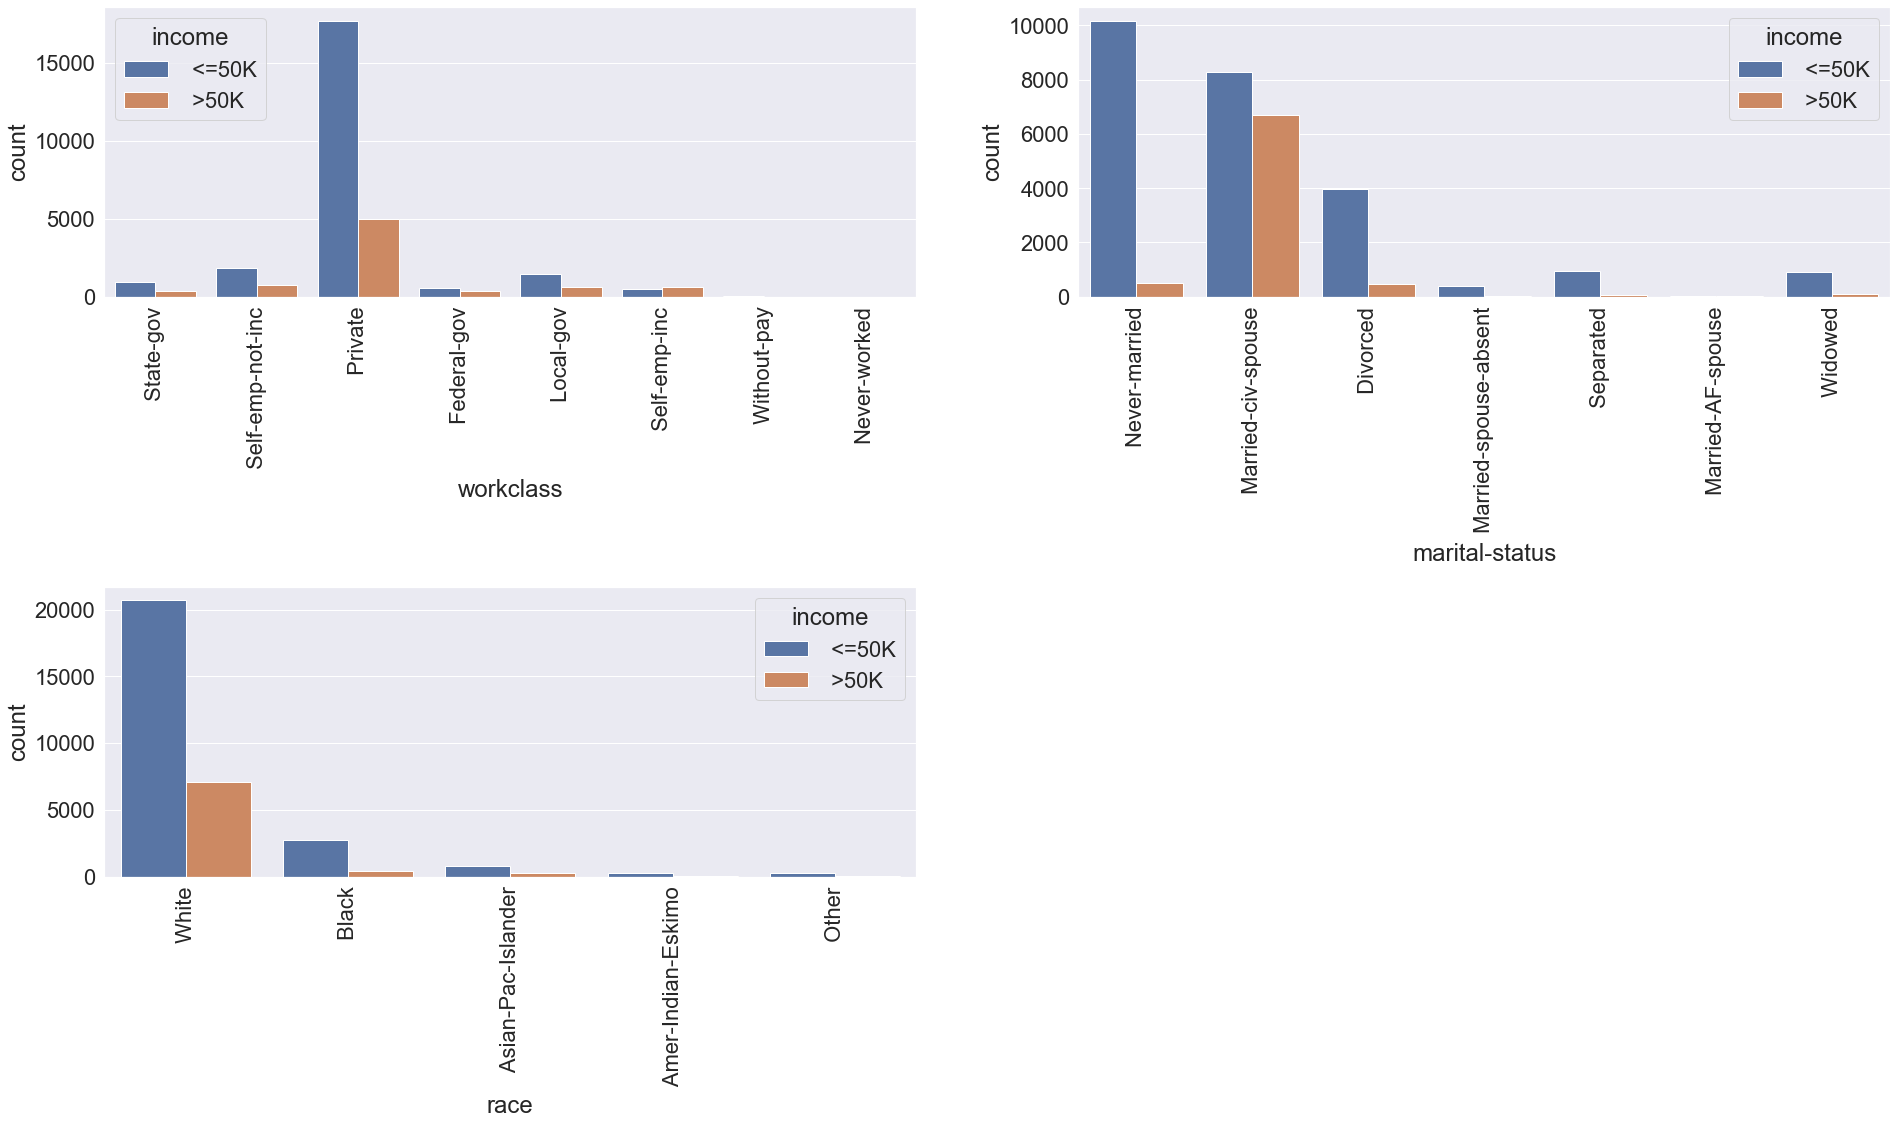

In [113]:
# Mapping the association between different classes, marital status, ethnicity and income
sns.set(font_scale=2)
plt.figure(figsize=(32,16)) 
plt.subplots_adjust(hspace=1) 
plt.subplot(221)
sns.countplot(data["workclass"],hue=data["income"])
plt.xticks(rotation=90) 

plt.subplot(222)
sns.countplot(data["marital-status"],hue=data["income"])
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(data["race"],hue=data["income"])
plt.xticks(rotation=90)

<AxesSubplot:>

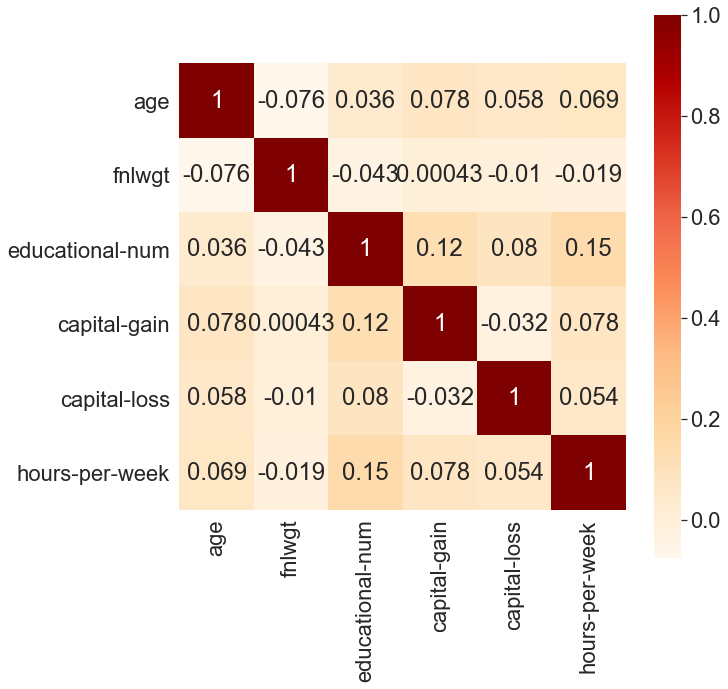

In [114]:
# Heat map of the correlation between the different variables
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),square=True,cmap="OrRd", annot = True)

In [115]:
# Mapping income variable values to 0 and 1
data['income']=data['income'].map({' <=50K': 0, ' >50K': 1})

In [116]:
# Dividing the data set into independent and dependent variables
X=data.drop('income',axis=1)
y=data['income']

In [117]:
X=X.drop(['native-country'],axis=1)

In [118]:
# Print the number of different marital statuses
X['marital-status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [119]:
# Simplifying the marital status variable to two values of married and single
X['marital-status']=X['marital-status'].map({' Married-civ-spouse':'Married', ' Divorced':'Single', ' Never-married':'Single', ' Separated':'Single', 
' Widowed':'Single', ' Married-spouse-absent':'Married', ' Married-AF-spouse':'Married'})

In [120]:
X['marital-status'].value_counts()

Single     17126
Married    15411
Name: marital-status, dtype: int64

In [121]:
# Mapping marital status to 0 and 1
X['marital-status']=X['marital-status'].map({'Single' : '0','Married' : '1'})

In [122]:
# Map gender to 0 and 1
X['gender']=X['gender'].map({' Male' : '0',' Female' : '1'}).astype(int)

In [123]:
# Normalize Numeric Variables
numerical = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']
scaler = MinMaxScaler()
X[numerical] = scaler.fit_transform(X[numerical])

In [124]:
# One-hot encoding of occupation, class, social variables
X = pd.get_dummies(X)

In [125]:
encoded = list(X.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

42 total features after one-hot encoding.


In [126]:
X.dtypes

age                              float64
fnlwgt                           float64
educational-num                    int64
gender                             int32
capital-gain                     float64
capital-loss                     float64
hours-per-week                   float64
workclass_ Federal-gov             uint8
workclass_ Local-gov               uint8
workclass_ Never-worked            uint8
workclass_ Private                 uint8
workclass_ Self-emp-inc            uint8
workclass_ Self-emp-not-inc        uint8
workclass_ State-gov               uint8
workclass_ Without-pay             uint8
marital-status_0                   uint8
marital-status_1                   uint8
occupation_ Adm-clerical           uint8
occupation_ Armed-Forces           uint8
occupation_ Craft-repair           uint8
occupation_ Exec-managerial        uint8
occupation_ Farming-fishing        uint8
occupation_ Handlers-cleaners      uint8
occupation_ Machine-op-inspct      uint8
occupation_ Othe

In [128]:
# Check for null values
X.isnull().sum()

age                              0
fnlwgt                           0
educational-num                  0
gender                           0
capital-gain                     0
capital-loss                     0
hours-per-week                   0
workclass_ Federal-gov           0
workclass_ Local-gov             0
workclass_ Never-worked          0
workclass_ Private               0
workclass_ Self-emp-inc          0
workclass_ Self-emp-not-inc      0
workclass_ State-gov             0
workclass_ Without-pay           0
marital-status_0                 0
marital-status_1                 0
occupation_ Adm-clerical         0
occupation_ Armed-Forces         0
occupation_ Craft-repair         0
occupation_ Exec-managerial      0
occupation_ Farming-fishing      0
occupation_ Handlers-cleaners    0
occupation_ Machine-op-inspct    0
occupation_ Other-service        0
occupation_ Priv-house-serv      0
occupation_ Prof-specialty       0
occupation_ Protective-serv      0
occupation_ Sales   

In [129]:
# Check for null values
y.isnull().sum()

0

In [131]:
# Divide the data set into a training set and a test set at a ratio of 7:3
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [133]:
# Build a random forest distribution model for training
model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier()

In [134]:
# Validate the model's accuracy on the training set
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9999560922063666

In [135]:
#Verify model accuracy on test set
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8527965580823602

In [137]:
# Set the tuning range
param_grid={
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200] 
}

In [138]:
# Build a tuning model
grid= GridSearchCV(RandomForestClassifier(),param_grid, verbose=3)

In [139]:
# Perform model tuning
grid.fit(train_x,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.830, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.800, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.839, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.811, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.820, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.830, total=   0.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.816, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.816, total=   0.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.821, total=   0.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.828, total=   0.3s
[CV] 

[CV] ....... max_depth=20, n_estimators=10, score=0.852, total=   0.2s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.862, total=   0.1s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.858, total=   0.2s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.856, total=   0.2s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.862, total=   0.2s
[CV] max_depth=20, n_estimators=50 ...................................
[CV] ....... max_depth=20, n_estimators=50, score=0.863, total=   0.7s
[CV] max_depth=20, n_estimators=50 ...................................
[CV] ....... max_depth=20, n_estimators=50, score=0.866, total=   0.7s
[CV] max_depth=20, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [140]:
# The highest printing accuracy parameter
grid.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [141]:
# Build a model based on optimal parameters
new_model=RandomForestClassifier(max_depth= 20, n_estimators= 100)
new_model.fit(train_x, train_y)

RandomForestClassifier(max_depth=20)

In [142]:
# Verify model accuracy on test set
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.8642696168817865